# Qualitative Bankruptcy Project 

Objective of this project is to predict the Bankruptcy from Qualitative parameters from experts using a dataset wherein:-
The Data contains details of some decision rules which can help in predicting "qualitative bankruptcy".

Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,f1_score
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder


from sklearn.cluster import KMeans
from sklearn import svm

Now let's have a quick read of the dataset and get a grip around the target variable and features

As we can see there are no Column Names present in the provided dataset file, so therefore, we will be adding it.


In [3]:
dfZ = pd.read_csv('Qualitative_Bankruptcy.data.txt',names = ["Industrial Risk","Management Risk","Financial Flexibility","Credibility","Competitiveness","Operating Risk","Class"])

Attribute Information: (P=Positive, A-Average, N-negative, B-Bankruptcy, NB-Non-Bankruptcy)
 1. Industrial Risk: {P,A,N}
 2. Management Risk: {P,A,N}
 3. Financial Flexibility: {P,A,N}
 4. Credibility: {P,A,N}
 5. Competitiveness: {P,A,N}
 6. Operating Risk: {P,A,N}
 7. Class: {B,NB}

Practicing Row Observation

In [4]:
dfZ.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [5]:
dfZ.shape

(250, 7)

As we can see all the attributes are of object type which we might need to convert.


In [6]:
dfZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB



We can also observe that 
No missing value is present in the dataset though it is also given in the provided information.


In [7]:
#Let's perform some Descriptive Statistics 
dfZ.describe().T

,count,unique,top,freq
Industrial Risk,250,3,N,89
Management Risk,250,3,N,119
Financial Flexibility,250,3,N,119
Credibility,250,3,N,94
Competitiveness,250,3,N,103
Operating Risk,250,3,N,114
Class,250,2,NB,143


In [8]:
dfZ.isnull().any()

Industrial Risk          False
Management Risk          False
Financial Flexibility    False
Credibility              False
Competitiveness          False
Operating Risk           False
Class                    False
dtype: bool

In [9]:
#Now let''s analyze the target column

In [10]:
dfZ['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64



As we can see class B looks like a little underrepresentation in the dataset.


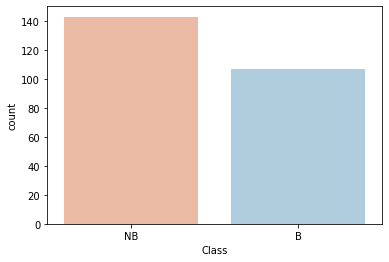

In [11]:
sns.countplot(dfZ['Class'],palette="RdBu")

Feature Analysis

Let's split the independent features seperately for analysis. Also, let's exclude the class column.


In [12]:
X = dfZ.iloc[:,0:6]

In [13]:
X.head(2)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N


Observation : 

In all the attributes the negative count is always high as compared to the average and positive counts.


In [14]:
X.apply(pd.Series.value_counts).T

,A,N,P
Industrial Risk,81,89,80
Management Risk,69,119,62
Financial Flexibility,74,119,57
Credibility,77,94,79
Competitiveness,56,103,91
Operating Risk,57,114,79


# CountPlot Analysis


Lets plot the countplot for all the attributes with respect to Class for visually analyzing the independent features.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


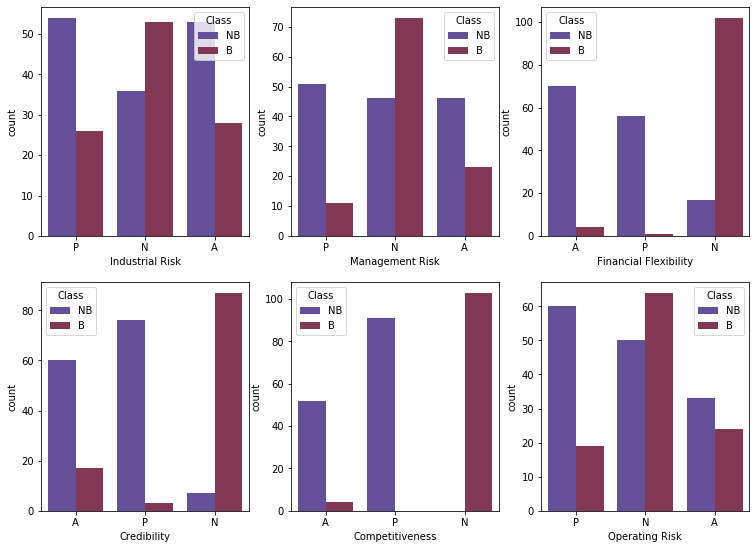

In [15]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax =plt.subplots(2,3)
fig.set_size_inches(12.7, 9.27)
sns.countplot(dfZ['Industrial Risk'],hue= dfZ['Class'],palette="twilight", ax=ax[0][0])
sns.countplot(dfZ["Management Risk"],hue= dfZ['Class'],palette="twilight", ax=ax[0][1])
sns.countplot(dfZ["Financial Flexibility"],hue= dfZ['Class'],palette="twilight", ax=ax[0][2])
sns.countplot(dfZ["Credibility"],hue= dfZ['Class'],palette="twilight", ax=ax[1][0])
sns.countplot(dfZ["Competitiveness"],hue= dfZ['Class'],palette="twilight", ax=ax[1][1])
sns.countplot(dfZ["Operating Risk"],hue= dfZ['Class'],palette="twilight", ax=ax[1][2])
#sns.countplot(dfZ["Class"],palette="twilight", ax=ax[1][2])
fig.show()



We can see below that the Bankruptcy is very high for the negative value on all the attributes and least for the positive values.


# Encoding Independent Features 

Let's use oneHotEncoder(for removing the order in the numerical data) to split the columns with numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.

In [16]:
X = OneHotEncoder().fit_transform(X).toarray()

DataFrame conversion for arrays

In [17]:
X_encoded = pd.DataFrame(X)



Each column has been split into 3 columns hence, we have 18 columns now as a result.


In [18]:
# Checking the dataframe
X_encoded.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


The datatypes are all converted into numerical form after applying encoding in the independent features.

In [19]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
0     250 non-null float64
1     250 non-null float64
2     250 non-null float64
3     250 non-null float64
4     250 non-null float64
5     250 non-null float64
6     250 non-null float64
7     250 non-null float64
8     250 non-null float64
9     250 non-null float64
10    250 non-null float64
11    250 non-null float64
12    250 non-null float64
13    250 non-null float64
14    250 non-null float64
15    250 non-null float64
16    250 non-null float64
17    250 non-null float64
dtypes: float64(18)
memory usage: 35.3 KB


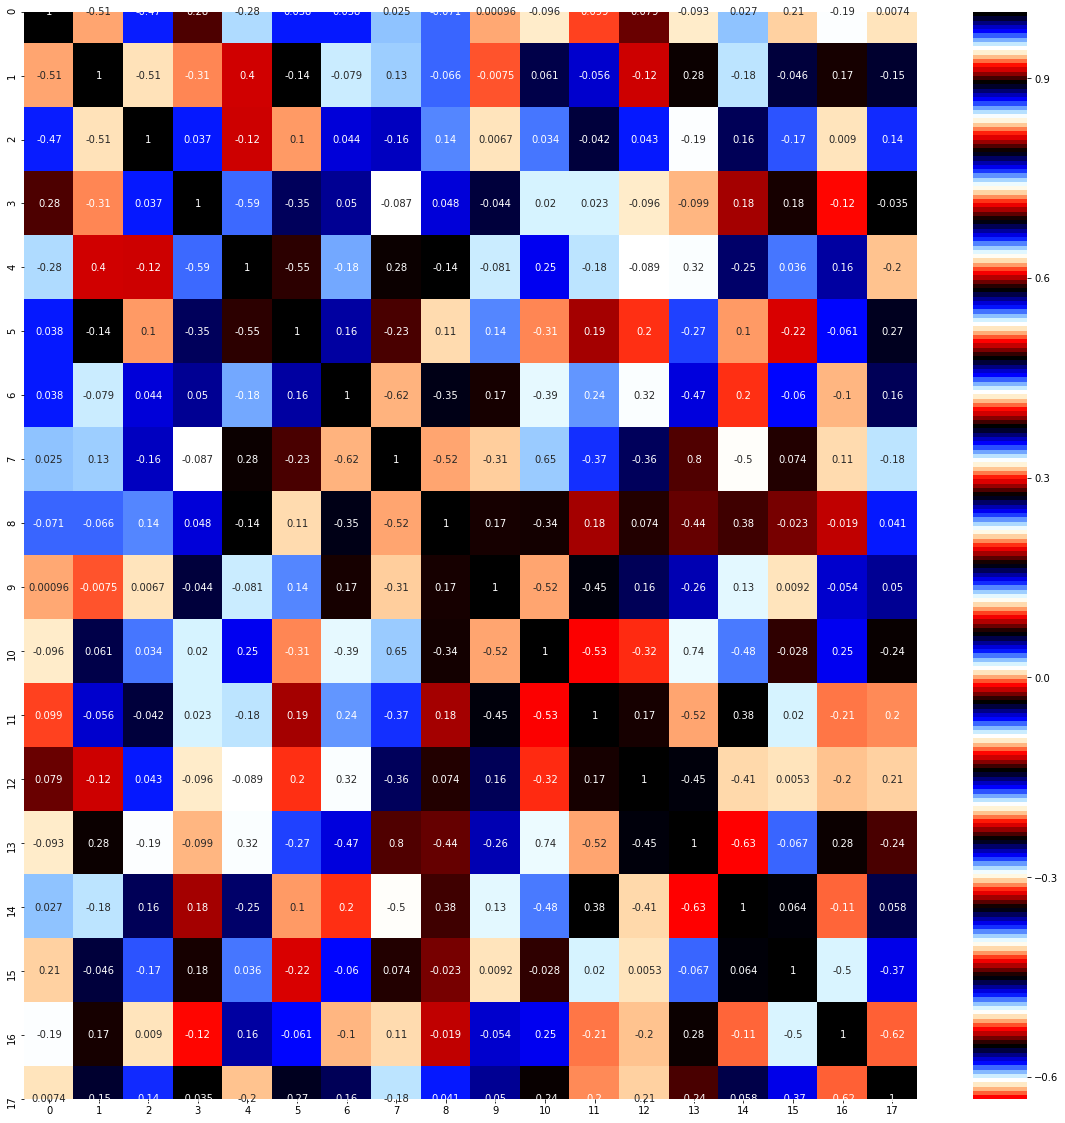

In [20]:
#Let's Do Some Correlation
x = X_encoded.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='flag',annot=True)
plt.show();

Observation :- 

Correlation between the PC's is very low.



Separation of the dependent variable from the rest of the train data 

Post creating X we will be creating 'y' which will be having the last 'Class' column.


In [21]:
y= dfZ.iloc[:,6]

In [22]:
y.head(2)

0    NB
1    NB
Name: Class, dtype: object

y - This dependent variable consists of one column and 250 records.


In [23]:
y.shape

(250,)

Rechecking the shape of all independent variables.


As we can see the shape consists of
18 columns and 250 records.


In [24]:
X_encoded.shape

(250, 18)

# Train Test Split

Let's split the dataset into training and test data and take an 80:20 ratio

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size = .20,random_state = 2)

The independent features of the training data comprises of 200 records and 18 columns.


In [26]:
X_train.shape

(200, 18)

The dependent feature of the training data comprises of 200 records and 1 column.

In [27]:
y_train.shape

(200,)



The independent features of the testing data comprises of 50 records and 18 columns.


In [28]:
X_test.shape

(50, 18)



The dependent feature of the testing data comprises of 50 records and 1 column.


In [29]:
y_test.shape

(50,)

# Principal Component Analysis 

Standardizing the independent features of X_train

In [30]:
sc = StandardScaler()
X_train_Sc =  sc.fit_transform(X_train)

Printing the information after computing the covariance matrix.

In [31]:
cov_matrix = np.cov(X_train_Sc.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00502513e+00 -5.11733746e-01 -4.83900986e-01  2.56218296e-01
  -2.47411457e-01  3.50566107e-02 -1.17061400e-02  7.45991161e-02
  -7.76937830e-02 -4.86764306e-02 -3.12924924e-02  8.14164038e-02
   6.99291870e-02 -2.89589786e-02 -3.04719616e-02  1.44865243e-01
  -1.48534265e-01  2.73809745e-02]
 [-5.11733746e-01  1.00502513e+00 -5.11733746e-01 -3.52992969e-01
   4.22664834e-01 -1.38866579e-01 -9.19616102e-02  1.27537269e-01
  -5.25721848e-02  5.62344776e-03  1.75592100e-02 -2.38146915e-02
  -1.11905197e-01  2.50032322e-01 -1.57775145e-01  1.36664043e-02
   1.43743872e-01 -1.68190414e-01]
 [-4.83900986e-01 -5.11733746e-01  1.00502513e+00  1.03252149e-01
  -1.83009342e-01  1.06358192e-01  1.05355260e-01 -2.04476714e-01
   1.31230676e-01  4.29497917e-02  1.34110682e-02 -5.71647090e-02
   4.40294881e-02 -2.25661475e-01  1.91142305e-01 -1.58782428e-01
   2.15267051e-03  1.43895760e-01]
 [ 2.56218296e-01 -3.52992969e-01  1.03252149e-01  1.00502513e+00
  -5.33043595e-01

Now let's calculate Eigen Vectors and Eigen Values

In [32]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-3.51175358e-02 -4.72596106e-01 -3.19412828e-02  1.06833909e-01
  -1.31655850e-01 -6.48437095e-02 -3.22612718e-01  2.44901748e-01
  -1.49101658e-01 -2.12535456e-02  4.59720094e-01  1.18736149e-01
  -8.53245013e-03  2.58607894e-02  3.33740045e-02 -5.52787504e-01
  -6.14864121e-03  1.48203717e-01]
 [ 1.59467772e-01  4.35756645e-01  1.28877060e-01  7.74823523e-02
  -2.44231097e-01 -2.47015697e-01  4.99984940e-01 -5.42997828e-02
   1.96449875e-01  4.82946445e-02  4.64889621e-02  6.26483025e-02
  -8.68902191e-03  2.63353389e-02  3.39864227e-02 -5.62931241e-01
  -6.26146972e-03  1.50923278e-01]
 [-1.27276495e-01  2.88432592e-02 -9.93006916e-02 -1.85738074e-01
   3.80368625e-01  3.16392183e-01 -1.86547023e-01 -1.89605555e-01
  -5.09531026e-02 -2.79273131e-02 -5.07062136e-01 -1.82534058e-01
  -8.53245013e-03  2.58607894e-02  3.33740045e-02 -5.52787504e-01
  -6.14864121e-03  1.48203717e-01]
 [-7.63942544e-02 -4.51037863e-01  2.03637234e-02 -1.55429624e-01
   2.68990986e-01 -

Now let's calculate the Principal Components

In [35]:
#Creating a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
# Further sorting the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs ,'\n')
# Extracting the eigenvalues and eigenvectors which were sorted in descending order
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

#printing out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(4.600672420252881, array([-0.03511754,  0.15946777, -0.12727649, -0.07639425,  0.25713771,
       -0.21346636, -0.25779479,  0.39699862, -0.19539724, -0.12963653,
        0.36815723, -0.24971586, -0.18131018,  0.4289941 , -0.2798519 ,
        0.04669178,  0.15077465, -0.20621509])), (2.149471468753017, array([-0.47259611,  0.43575665,  0.02884326, -0.45103786,  0.3134098 ,
        0.07349572,  0.01943061, -0.15931172,  0.17213227,  0.19917317,
       -0.16838697, -0.02682785, -0.00618159, -0.05350819,  0.05954572,
       -0.26537441,  0.27410582, -0.05233451])), (1.847555768758571, array([-0.13165585, -0.2442311 ,  0.38036863,  0.26899099, -0.18719258,
       -0.04352096, -0.1742011 , -0.04827695,  0.2530451 ,  0.03734471,
        0.12721751, -0.16911311, -0.42625669,  0.01089688,  0.35368305,
       -0.1587069 ,  0.36410024, -0.24798706])), (1.7641856808410081, array([-0.06484371, -0.2470157 ,  0.31639218, -0.1307115 , -0.22457736,
        0.37049276,  0.07053096,  0.09594587, -0.19

Elbow Plot 

In [36]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
# Let's make an array of variance which will be explained by each eigen vector... which is "there will be 8 entries as there are 8 eigen vectors)"
cum_var_exp = np.cumsum(var_explained)  
# Then comes an array of cumulative variance. There will be 8 entries with 8th entry 
# Cumulative reaching almost 100%

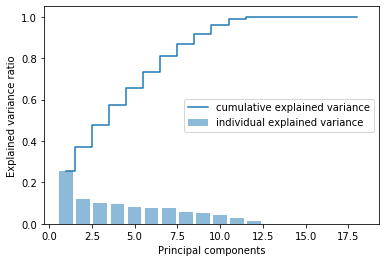

In [39]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [40]:
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
print(var_explained)

[0.2543149476750905, 0.11881800618940319, 0.10212877721748795, 0.0975202640242671, 0.08212985444237471, 0.076916636074634, 0.0762878843095616, 0.058084876119299515, 0.051084785928861565, 0.044304981910362945, 0.02636530313125163, 0.012043682977406005, -5.157518107199631e-17, -7.951892454368461e-17, -1.1935399056179087e-16, -1.3854115036104884e-16, -1.9201434537223437e-16, -2.4972500517699384e-16]


PC1 is capturing highest information

We need to get >95% of var so therefore, we will be considering 10 PC's  

# Data Transformation Using Principal Component Analysis

In [41]:
pca = PCA(n_components= 10).fit(X_train_Sc)
X_train_pca = pca.transform(X_train_Sc)

As we can see after performing PCA the training data is having 11 columns and 200 records

In [42]:
X_train_pca.shape

(200, 10)

In [43]:
print(pca.explained_variance_ratio_)

[0.25431495 0.11881801 0.10212878 0.09752026 0.08212985 0.07691664
 0.07628788 0.05808488 0.05108479 0.04430498]


Now it's time to project the variance in relation to the Principle Components

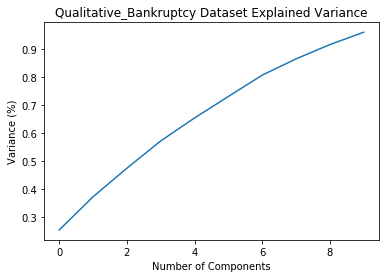

In [44]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Qualitative_Bankruptcy Dataset Explained Variance')
plt.show()


Let's apply KMeans algorithm on the transformed data

In [45]:
X_train_pca = pd.DataFrame(X_train_pca)

Now it's time for Data Visualization

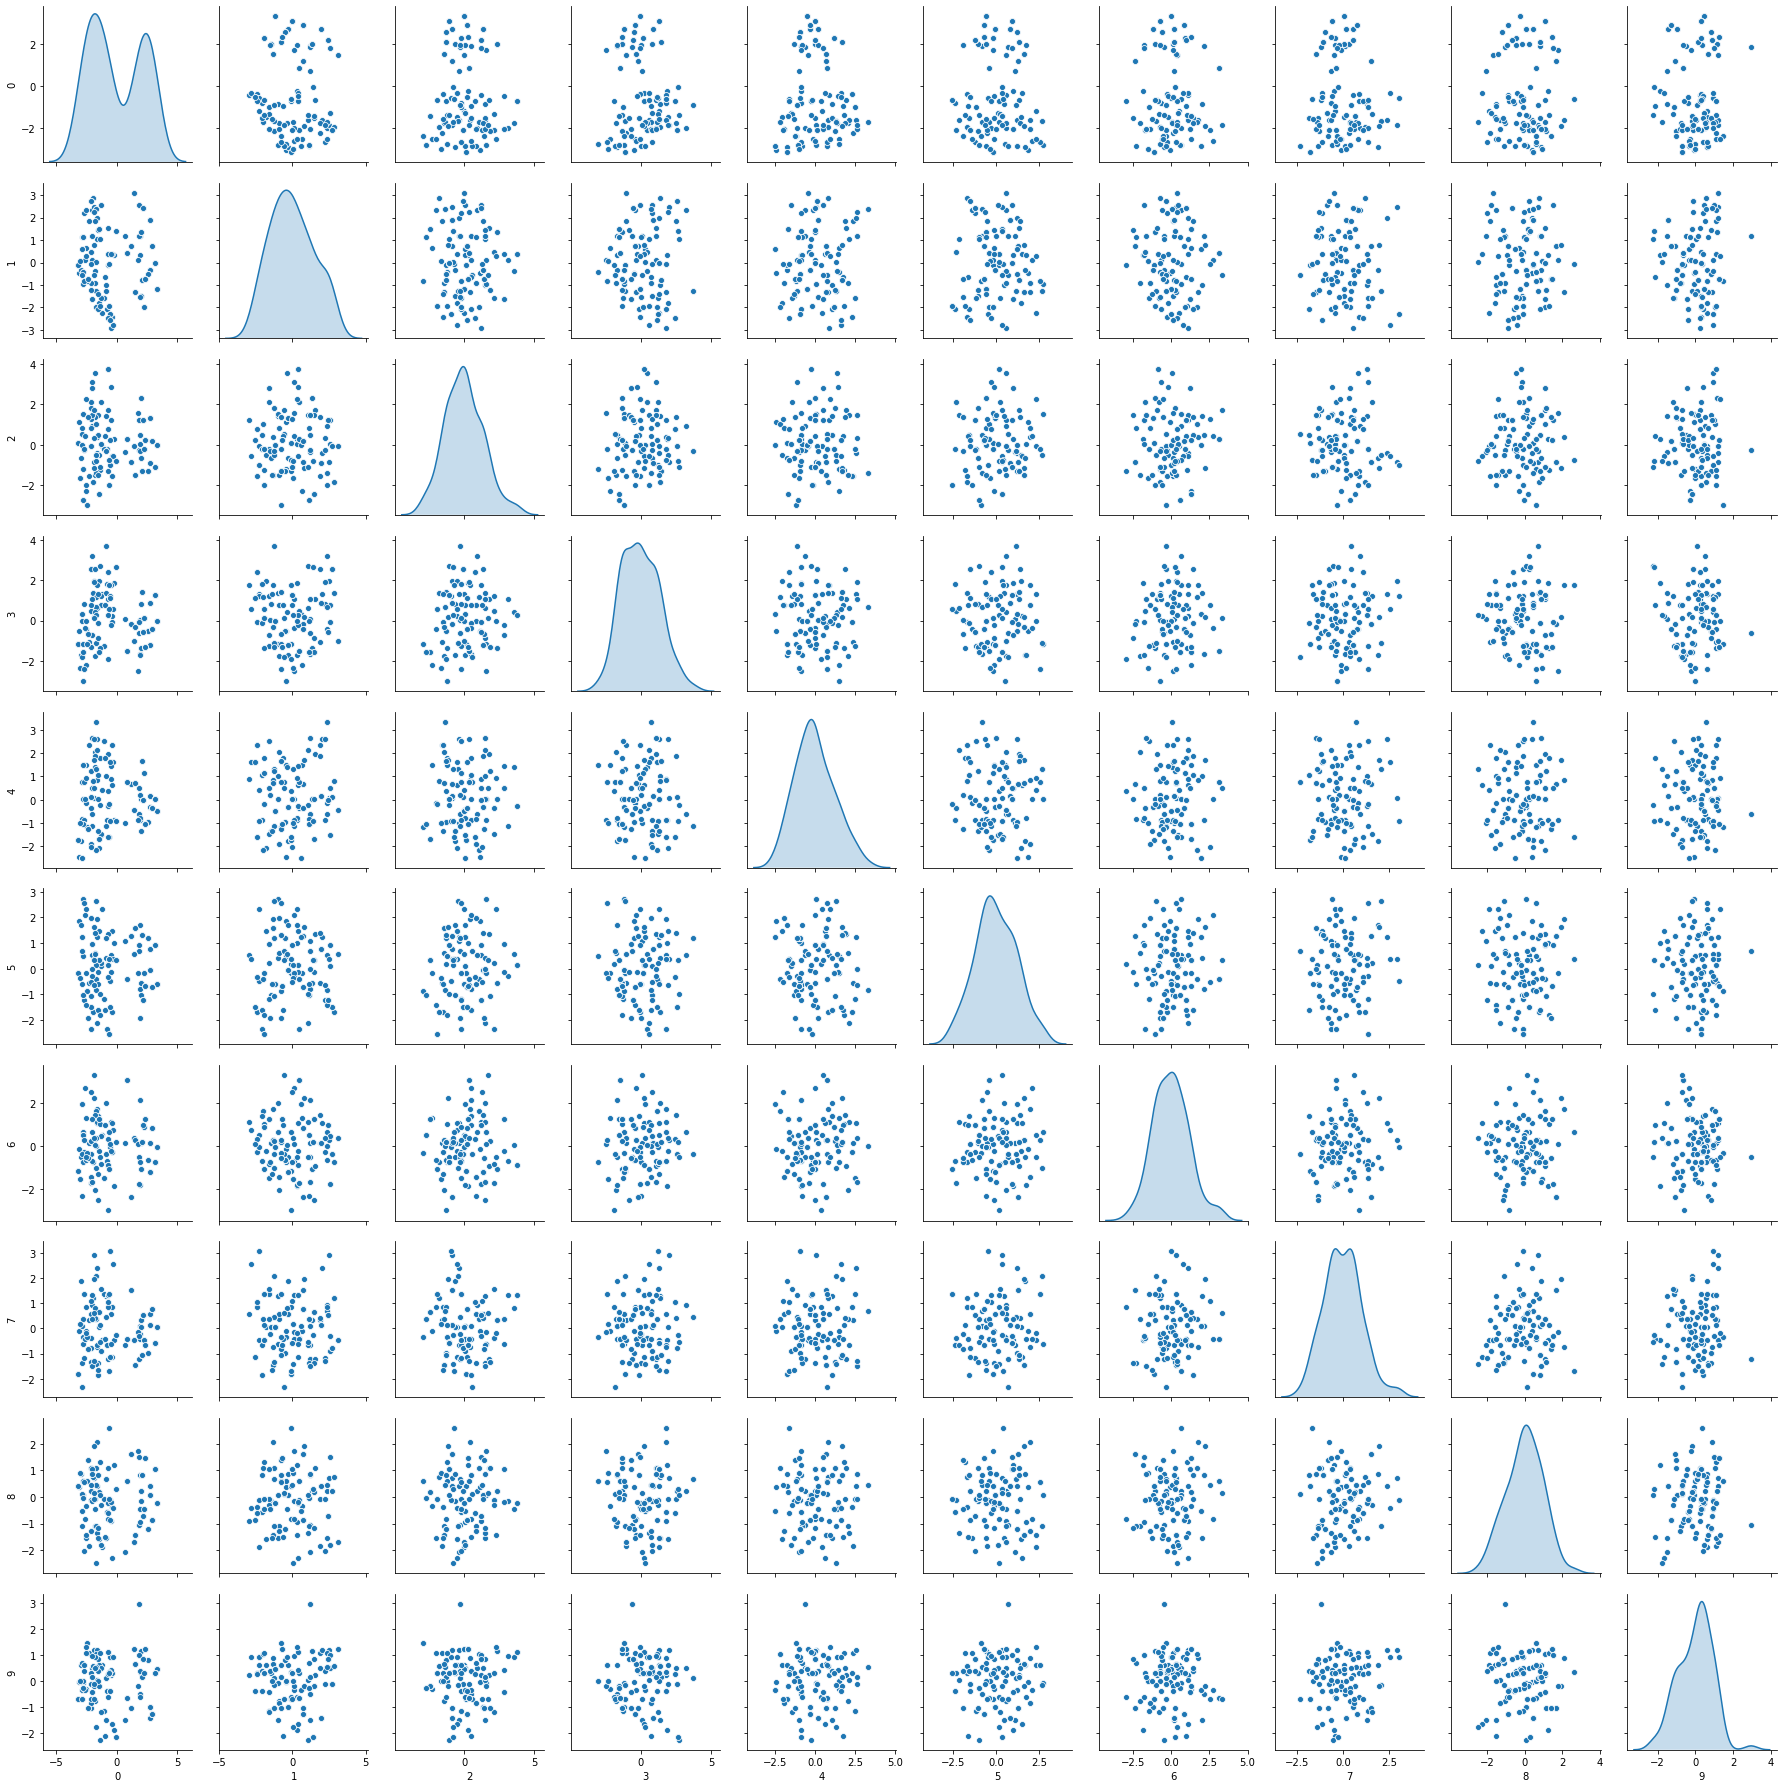

In [46]:
sns.pairplot(X_train_pca,diag_kind = 'kde', palette="twilight")

Observation - When we visualize the data from the X-axis then a maximum of 2 heaps are visible in any of the feature and from the Y-axis also maximum of 2 clusters are visible .
We can consider visualizing from 2 to 4 clusters.
Also, there is a scatterplot between te Eigen Vectors that informs of no relationship between them

Now, let's use K-Means clustering to group data based on their attribute. 
Also, we need to determine the optimal number of groups. For that we will conduct the knee test to see where the knee happens

In [47]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_train_pca)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3461.727650
1,2,2647.234827
2,3,2354.370351
3,4,2179.836575
4,5,2011.332891
5,6,1881.611459
6,7,1755.981391
7,8,1649.448495
8,9,1568.476115


Now it's time for an Elbow Plot

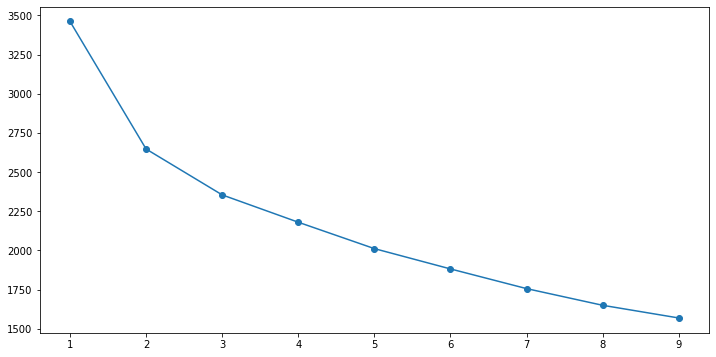

In [48]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Locating and then selecting optimal number of clusters

Text(0.5, 1.0, 'K selection practiced using Elbow Method')

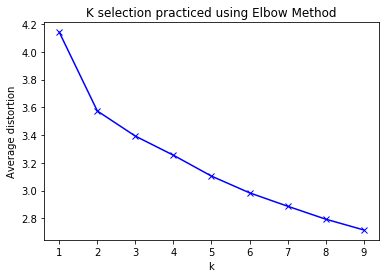

In [50]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_train_pca)
    prediction=model.predict(X_train_pca)
    meanDistortions.append(sum(np.min(cdist(X_train_pca, model.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('K selection practiced using Elbow Method')



We can see a bent at K=2 which tells us that the said number of clusters is the optimal number of clusters probably the dataset is having.


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.22618816261724867


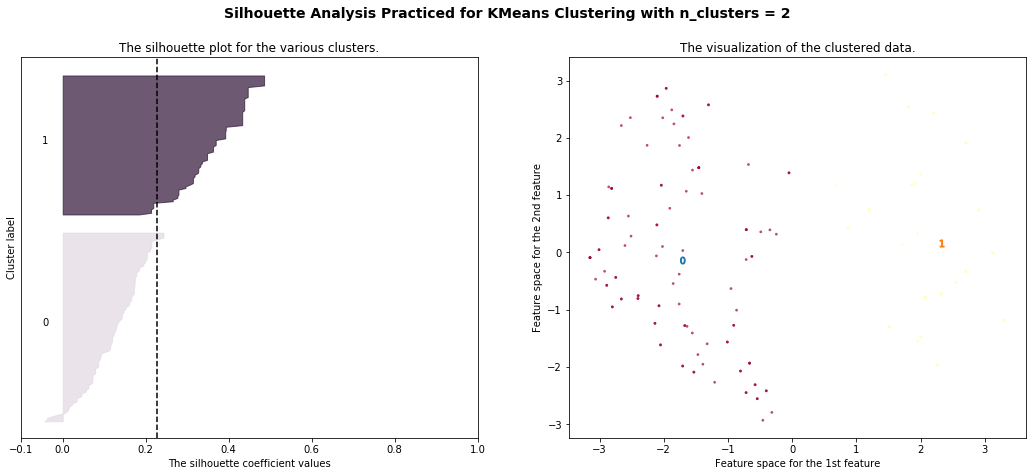

For n_clusters = 3 The average silhouette_score is : 0.22537389373542357


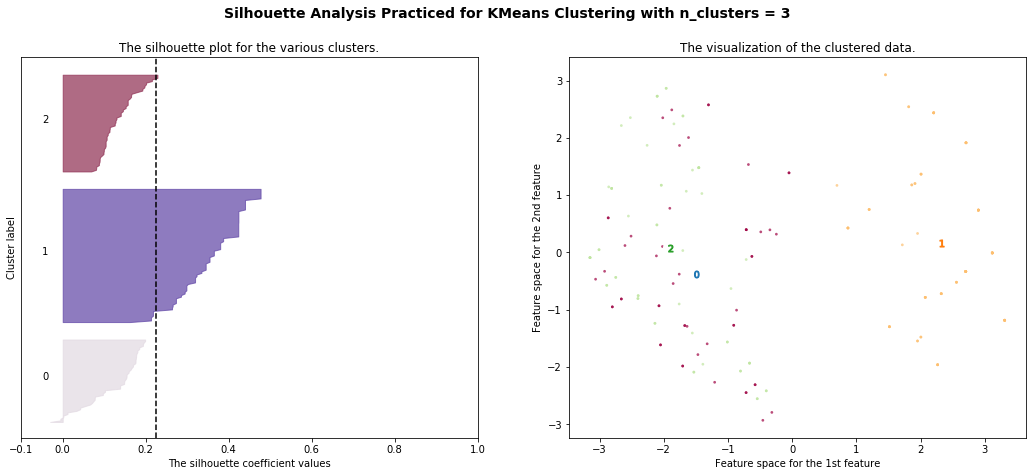

For n_clusters = 4 The average silhouette_score is : 0.22819419471499963


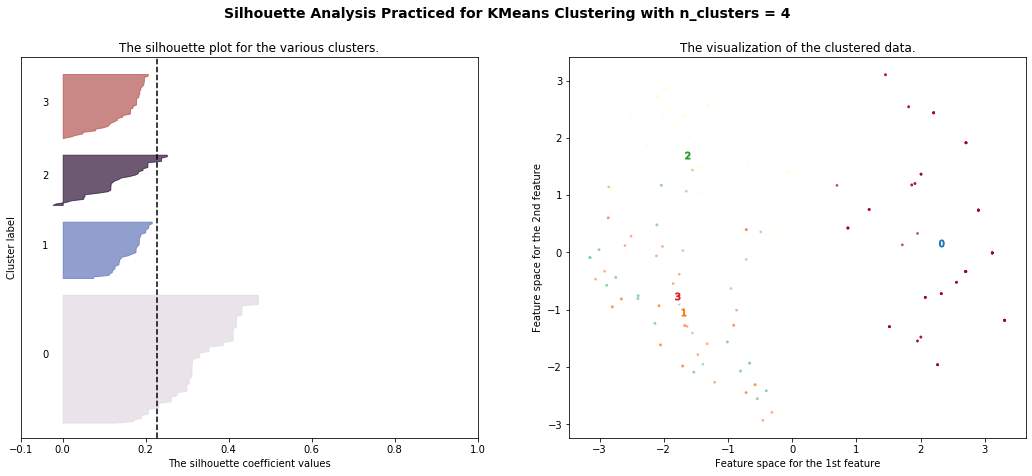

For n_clusters = 5 The average silhouette_score is : 0.18837434271662534


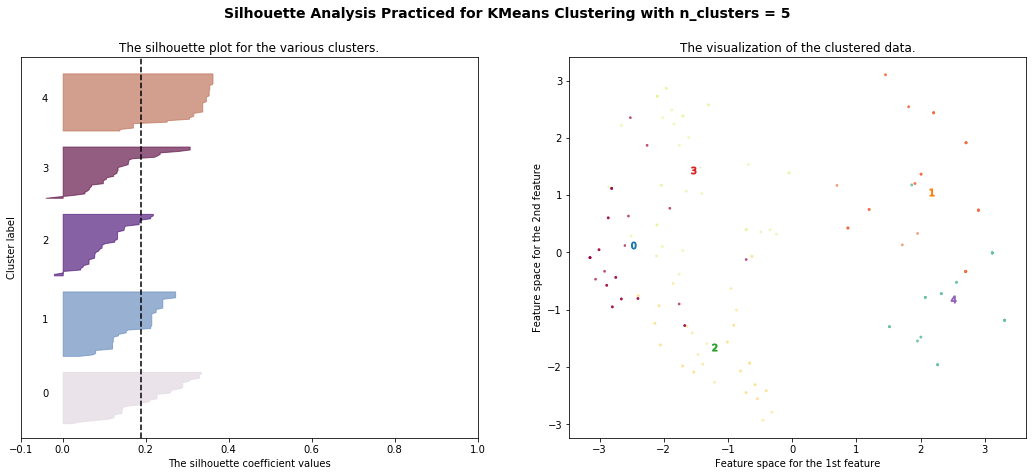

For n_clusters = 6 The average silhouette_score is : 0.19083440055596107


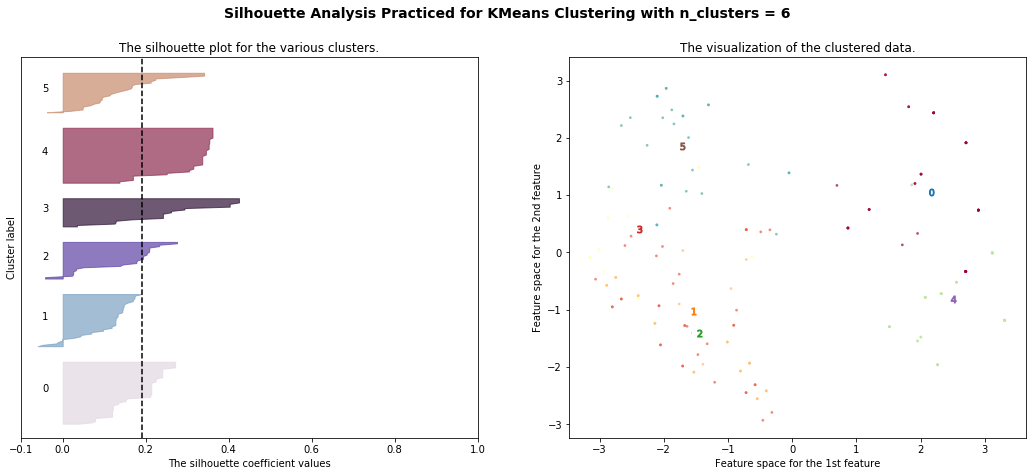

In [54]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Let's generate the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters are placed close together.

X= X_train_pca
y= y_train


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Creating a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
# First to appear will be silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this situation all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initializing the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score will give the average value for all the samples.
    # This will further provide us with a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Calculating the silhouette scores for each and every sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Collection of the silhouette scores for samples belonging to cluster i, and sort them
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.twilight(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Labelling the silhouette plots with their cluster numbers in the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calculation done for the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="black", linestyle="--")

    ax1.set_yticks([])  # This is for clearing the y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # The second plot shows the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labelling the clusters
    centers = clusterer.cluster_centers_
    # Drawing white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette Analysis Practiced for KMeans Clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    


Cluster Formation Out of The Train Data

In [56]:
model_Kmeans=KMeans(n_clusters=2, n_init = 15, random_state=7)
model_Kmeans.fit(X_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

Putting a new column in the train data and inserting cluster labels in the new column 

In [57]:
prediction_train = model_Kmeans.predict(X_train_pca)

In [58]:
prediction_train.shape

(200,)

In [64]:
X_train_pca_copy = X_train_pca.copy()

In [65]:
X_train_pca_copy['Group'] = prediction_train

In [66]:
X_train_pca_copy.head(2)

,0,1,2,3,4,5,6,7,8,9,Group
0,-2.259133,1.869471,-1.559730,-1.063595,2.363942,-0.557740,0.142560,0.326950,-1.826508,1.069904,1
1,2.899599,0.738246,0.215731,-0.406589,-0.335260,-0.698811,0.855743,0.773592,-0.863242,-1.282511,0


Test Data Transformation using the same PCA object that was fit on the train data

In [67]:
X_test_Sc = sc.transform(X_test)

In [68]:
X_test_pca = pca.transform(X_test_Sc)

In [69]:
X_test_pca.shape

(50, 10)



K Means Algorithm on The Test Data

In [70]:
model_Kmeans.fit(X_test_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [71]:
prediction_test = model_Kmeans.predict(X_test_pca)

In [72]:
prediction_test

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0])

In [73]:
X_test_pca_copy = X_test_pca.copy()

In [74]:
X_test_pca_copy = pd.DataFrame(X_test_pca_copy)
X_test_pca_copy['Group'] = prediction_test

In [75]:
X_test_pca_copy.tail(2)

,0,1,2,3,4,5,6,7,8,9,Group
48,2.899599,0.738246,0.215731,-0.406589,-0.335260,-0.698811,0.855743,0.773592,-0.863242,-1.282511,1
49,-2.811288,1.117881,-2.739124,-1.538416,-1.033951,-1.006919,0.546599,0.390545,-0.016167,-0.281408,0


Applying SVC model on train dataset and predicting target for test dataset

In [77]:
clf = svm.SVC(gamma=0.025, C=3)  

In [78]:
clf.fit(X_train_pca,y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
y_pred = clf.predict(X_test_pca)

In [80]:
X_test_pca.shape

(50, 10)

Accuracy and Confusion Matrix

In [81]:
clf.score(X_train_pca,y_train)

1.0

In [82]:
clf.score(X_test_pca,y_test)

0.98

In [83]:
pd.crosstab(y_test,y_pred)

col_0,B,NB
Class,,
B,22,1
NB,0,27


In [84]:
print(confusion_matrix(y_test, y_pred))

[[22  1]
 [ 0 27]]


In [85]:
y_test.value_counts()

NB    27
B     23
Name: Class, dtype: int64


One misclassification- The false positive = 1 means 'B' is classified as 'NB'.


In [86]:
from sklearn.metrics import classification_report
target_names = ['B', 'NB' ]

In [87]:
print(classification_report(y_test, y_pred, target_names= target_names))

              precision    recall  f1-score   support

           B       1.00      0.96      0.98        23
          NB       0.96      1.00      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50





Class B:

Precision : out of 22 points identified as positive by the model are actually positive i.e 'B'. 100%

Recall : out of 23 points model correctly predicted 22 points. 96%
